In [4]:
import numpy as np
import pandas as pd
import os
import matplotlib.pylab as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from keras.callbacks import ModelCheckpoint

In [5]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_path = "data_yawning/train"
test_path = "data_yawning/test"

# Get a list of subdirectories in the training and testing directories
train_subdirectories = [d for d in os.listdir(train_path) if os.path.isdir(os.path.join(train_path, d))]
test_subdirectories = [d for d in os.listdir(test_path) if os.path.isdir(os.path.join(test_path, d))]

# Filter out the ".ipynb_checkpoints" folder
train_subdirectories = [d for d in train_subdirectories if d != ".ipynb_checkpoints"]
test_subdirectories = [d for d in test_subdirectories if d != ".ipynb_checkpoints"]

# Create data generators
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

x_train = train_datagen.flow_from_directory(train_path, target_size=(256, 256), batch_size=32, color_mode='grayscale', class_mode='categorical', classes=train_subdirectories)
x_test = test_datagen.flow_from_directory(test_path, target_size=(256, 256), batch_size=32, color_mode='grayscale', class_mode='categorical', classes=test_subdirectories)

x_train.class_indices

Found 1233 images belonging to 2 classes.
Found 215 images belonging to 2 classes.


{'no_yawn': 0, 'yawn': 1}

In [6]:
classes=2
model = Sequential()
model.add(Conv2D(16, (3,3), padding = 'same', input_shape = (256,256,1), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(32, (3,3), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64, (3,3), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(128,(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2))) 

model.add(Flatten())

model.add(Dense(128, activation = 'relu'))

model.add(Dense(classes, activation = 'softmax'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 16)      160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 128, 128, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 64, 64, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 32, 32, 64)        0

In [7]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics='accuracy')

In [8]:
model_path="yawn_detection1.h5"

checkpoint = ModelCheckpoint(model_path, monitor='val_accuracy', verbose=1, 
                              save_best_only=True, mode='max')

callbacks_list = [checkpoint]

In [9]:
num_epochs = 50
training_steps=x_train.n//x_train.batch_size
validation_steps =x_test.n//x_test.batch_size

history = model.fit_generator(x_train, epochs=num_epochs, steps_per_epoch=training_steps,validation_data=x_test,
                    validation_steps=validation_steps, callbacks = callbacks_list)

C:\Users\ajars\AppData\Local\Temp\ipykernel_16548\1703616830.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(x_train, epochs=num_epochs, steps_per_epoch=training_steps,validation_data=x_test,


Epoch 1/50
38/38 [==============================] - ETA: 0s - loss: 0.6768 - accuracy: 0.5853
Epoch 1: val_accuracy improved from -inf to 0.53646, saving model to yawn_detection1.h5
38/38 [==============================] - 25s 637ms/step - loss: 0.6768 - accuracy: 0.5853 - val_loss: 0.8870 - val_accuracy: 0.5365
Epoch 2/50


C:\Users\ajars\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


38/38 [==============================] - ETA: 0s - loss: 0.6082 - accuracy: 0.6586
Epoch 2: val_accuracy improved from 0.53646 to 0.58854, saving model to yawn_detection1.h5
38/38 [==============================] - 27s 714ms/step - loss: 0.6082 - accuracy: 0.6586 - val_loss: 0.6034 - val_accuracy: 0.5885
Epoch 3/50
38/38 [==============================] - ETA: 0s - loss: 0.5759 - accuracy: 0.6703
Epoch 3: val_accuracy improved from 0.58854 to 0.66667, saving model to yawn_detection1.h5
38/38 [==============================] - 28s 721ms/step - loss: 0.5759 - accuracy: 0.6703 - val_loss: 0.5866 - val_accuracy: 0.6667
Epoch 4/50
38/38 [==============================] - ETA: 0s - loss: 0.5499 - accuracy: 0.6811
Epoch 4: val_accuracy did not improve from 0.66667
38/38 [==============================] - 28s 729ms/step - loss: 0.5499 - accuracy: 0.6811 - val_loss: 0.5642 - val_accuracy: 0.6302
Epoch 5/50
38/38 [==============================] - ETA: 0s - loss: 0.5362 - accuracy: 0.6978
Epoch 

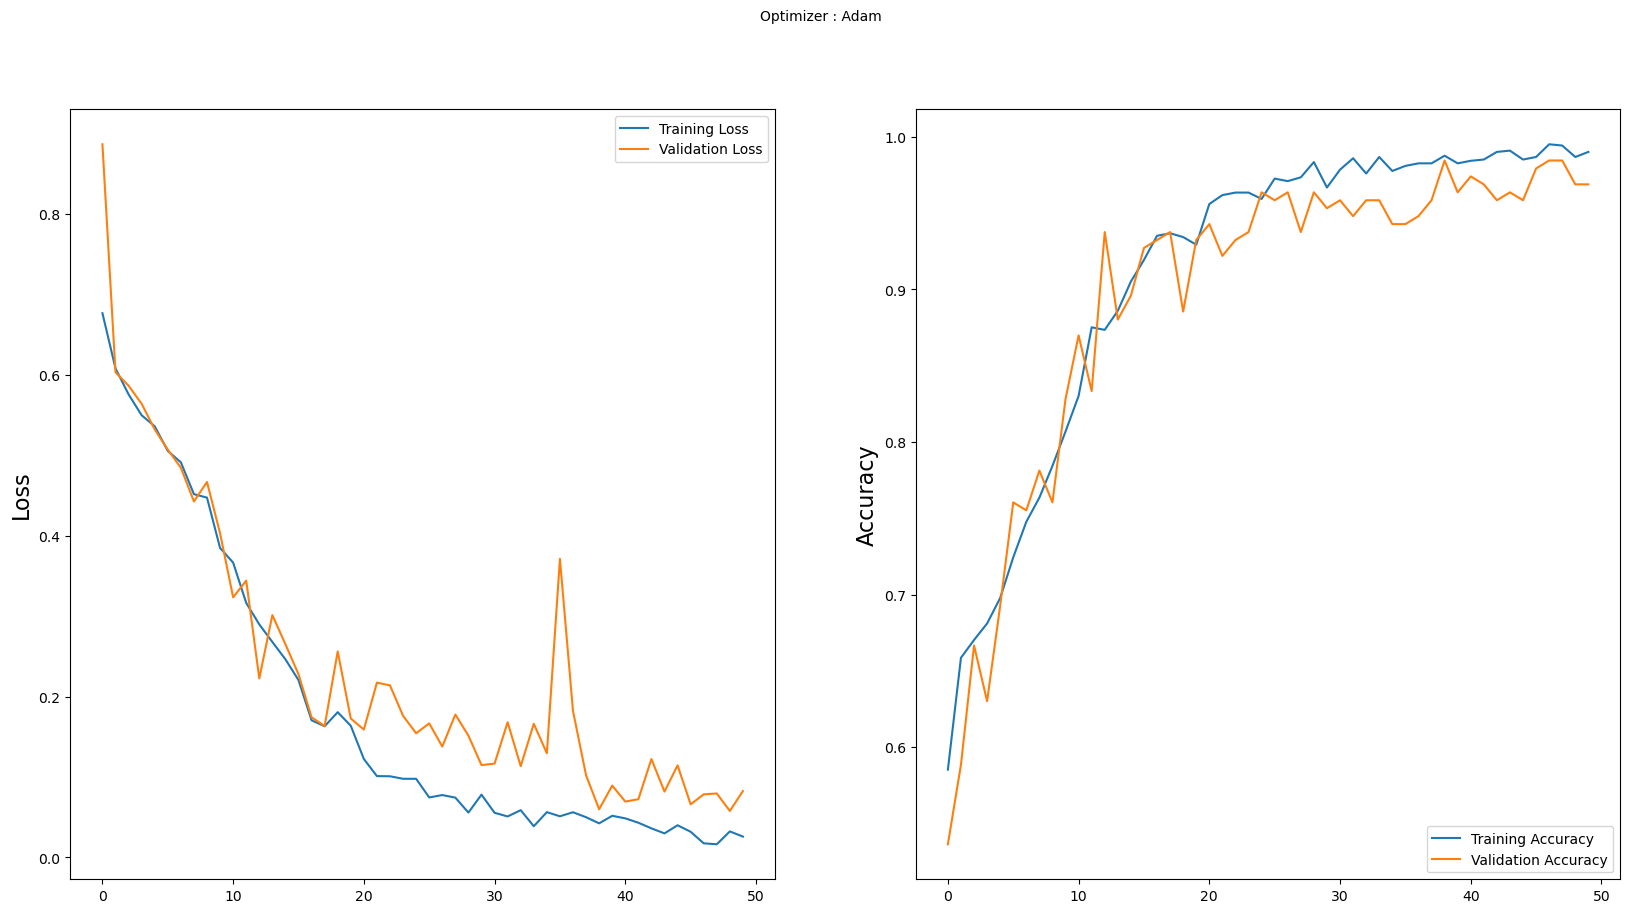

In [17]:
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [11]:
img=image.load_img(r"C:\Users\ajars\Downloads\photo_2023-11-19_23-03-42.jpg", target_size= (256,256), color_mode="grayscale")
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)

In [15]:
pred=np.argmax(model.predict(x))
pred

1/1 [==============================] - 0s 28ms/step


1

In [16]:
if pred < 0.5:
    print("no yawn")
else:
    print("yawn")

yawn
